# 1 - Registro de Objetos

# 2 - Membros


Felipe Seppe    - 2017014596 <br>
Rafael Oliveira - 2017014685 <br>
Vitor Rezende   - 2017014723

# 3 - Descrição dos Dados

Os dados de Registro de Objetos pelo INMETRO estão disponíveis no Portal Brasileiro de Dados Abertos, e pode ser acessado pelo link http://dados.gov.br/dataset/registro-de-objetos. Os dados possuem 27 atributos e 2.086.910 linhas divididas em 71 categorias (arquivos) diferentes, totalizando 2GB, aproximadamente. Devido ao grande tamanho e dificuldades operacionais com o _dataset_, foram escolhidos, de forma aleatória, 35 arquivos dos 71 e concatenados em um único arquivo, resultando em 529.668 linhas. Em seguida criamos um novo atributo chamado _CodItem_, a criação desse atributo fez-se necessária devido ao fato de se ter uma chave primária composta pelos atributos ItemMarca e ItemModelo. <br>
O processamento dos dados pode ser visto no arquivo _createDB.ipynb_, disponível [aqui](https://github.com/fseppe/RegistroDeObjetos-IBD/).

# 4 - Diagrama ER

__OBS:__ Linhas com duas barras no início significa participação total e uma barra apenas significa participação partcial.
<img src='https://github.com/fseppe/RegistroDeObjetos-IBD/blob/master/imgs/Diagrama%20ER%20-%20Registro%20de%20Objetos.png?raw=1'>

# 5 - Diagrama relacional


<img src='https://github.com/fseppe/RegistroDeObjetos-IBD/blob/master/imgs/Esquema%20Relacional%20-%20Registro%20de%20Objetos%20GOV.png?raw=1'>

# 6 - Consultas

In [1]:
# Baixando o banco de dados
# !wget --no-check-certificate --quiet https://github.com/Goncalves-Rafael/IBD_2-2019/raw/master/RegistroObjetos.zip
# !unzip RegistroObjetos.zip

In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect("RegistroObjetos.db")
c = conn.cursor()
c.execute('PRAGMA cache_size = 0')
conn.commit()

### 6.1 - Duas consultas envolvendo seleção e projeção

#### 6.1.1 - Consulta 1 (duas versões)
1. PAC (Programa de Avaliação da Conformidade) corresponde aos registros concedidos dentre os citados. Ou seja, qual tipo de concessão os arquivos tratam.

In [3]:
df = pd.read_sql('select Pac from Objeto GROUP BY Pac', conn)
df

,Pac
0,Acessibilidade em Embarcações Utilizadas no Tr...
1,Agente Redutor Líquido de NOx Automotivo - ARL...
2,"Aplicação, Reparo e Reforma de Revestimento In..."
3,Artigos escolares
4,Artigos para Festas
5,Assentos Plásticos para Espectadores de Evento...
6,Bombas e Motobombas Centrífugas
7,Carrinhos para crianças
8,Colchões e Colchonetes de Espuma Flexível de P...
9,Componentes automotivos importados de baixo vo...


In [4]:
df = pd.read_sql('select distinct Pac from Objeto', conn)
df

,Pac
0,Acessibilidade em Embarcações Utilizadas no Tr...
1,Agente Redutor Líquido de NOx Automotivo - ARL...
2,"Aplicação, Reparo e Reforma de Revestimento In..."
3,Artigos escolares
4,Artigos para Festas
5,Assentos Plásticos para Espectadores de Evento...
6,Bombas e Motobombas Centrífugas
7,Carrinhos para crianças
8,Colchões e Colchonetes de Espuma Flexível de P...
9,Componentes automotivos importados de baixo vo...


#### 6.1.2 - Consulta 2 (duas versões)
2. Sabendo que a BMW faz parte de base de dados coletada e sua Razão Social correspondente é "BMW do Brasil LTDA", mostre o endereço completo da sede da empresa.

In [5]:
df = pd.read_sql('select RazaoSocial,Logradouro, Numero, Complemento, Cep, Bairro, Municipio, UF '+
                 'from Empresa where RazaoSocial = "BMW do Brasil LTDA"', conn)

df

,RazaoSocial,Logradouro,Numero,Complemento,Cep,Bairro,Municipio,UF
0,BMW do Brasil LTDA,V AC NORTE KM 38 (ROD ANHANGUERA),420,Bloco 5,07789100,GATO PRETO,Cajamar,SP


In [6]:
df = pd.read_sql('select RazaoSocial,Logradouro, Numero, Complemento, Cep as CEP, Bairro, Municipio, UF as Estado '+
                 'from Empresa where RazaoSocial in ("BMW do Brasil LTDA")', conn)
df

,RazaoSocial,Logradouro,Numero,Complemento,CEP,Bairro,Municipio,Estado
0,BMW do Brasil LTDA,V AC NORTE KM 38 (ROD ANHANGUERA),420,Bloco 5,07789100,GATO PRETO,Cajamar,SP


### 6.2 - Três consultas envolvendo junção de duas relações

#### 6.2.1 - Consulta 3 (duas versões)
3. Estados em ordem crescente que tem a maior quantidade de registros de objetos e serviços em  status de ativo.

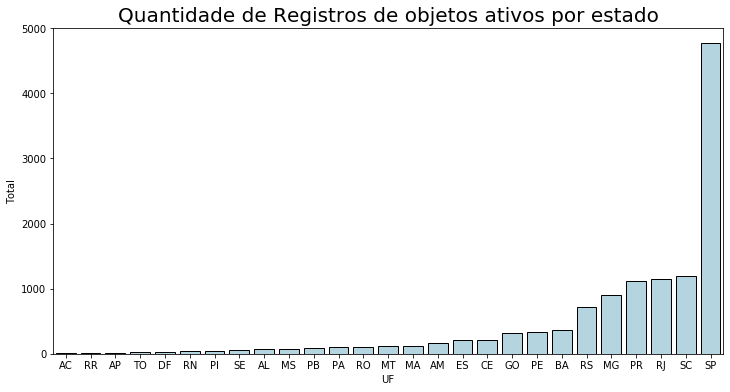

In [7]:
#consulta com junção de duas tabelas

df = pd.read_sql('select UF, count(*) as Total from '+
                      'Empresa as e natural join Registros as r '+
                      'where r.Status = "Ativo" '+
                      'group by UF '+
                      'order by total ASC ', conn)

plt.figure(figsize = (12,6))
sns.barplot(x=df['UF'], y=df['Total'], color='lightblue', edgecolor='k')
plt.title('Quantidade de Registros de objetos ativos por estado', fontsize=20)
plt.xticks(rotation=0)
plt.show()

In [8]:
#consulta com junção de duas tabelas
df = pd.read_sql('select UF, count(*) as Total '+
                      'from Registros as r join Empresa as e on r.CNPJ = e.CNPJ '+
                      'where r.Status = "Ativo" '+
                      'group by UF '+
                      'order by total ASC ', conn)
df

,UF,Total
0,AC,5
1,RR,6
2,AP,17
3,TO,31
4,DF,33
5,RN,43
6,PI,47
7,SE,53
8,AL,75
9,MS,76


#### 6.2.2 - Consulta 4 (duas versões)
4. CNPJ, razão social e UF de empresas com pelo menos um registro referente a um item com status excluído.

In [9]:
df = pd.read_sql( 'SELECT CNPJ, RazaoSocial, UF FROM Empresa e '
                  ' NATURAL JOIN '
                  '   (SELECT r.CNPJ FROM Registros r NATURAL JOIN Item i '
                  '   WHERE i.ItemStatus = \'Excluido\') '
                  'GROUP BY CNPJ', conn)

df

,CNPJ,RazaoSocial,UF
0,00142835000186,A.S.F. & Jr Indústria Plástica Ltda.,SP
1,00191545000122,CHINVEST COMERCIO IMPORTACAO E EXPORTACAO LTDA,RJ
2,00191545000394,CHINVEST COMERCIO IMPORTACAO E EXPORTACAO LTDA,RJ
3,00212299000148,Extinzuk Comercio De Extintores LTDA,PR
4,00265205000107,LAKYS MATERIAIS CONTRA INCÊNDIO LTDA - ME,SP
...,...,...,...
631,94127776000110,Castor Sul Indústria e Comércio de Colchões Ltda,RS
632,95443594000111,FORMA STYLO COLCHÕES E ESPUMAS LTDA,PR
633,96738240000167,Reconflex Indústria e Comércio de Colchões Ltda.,BA
634,97044564000168,Netuno Indústria de Acessórios para Piscinas Ltda,RS


In [10]:
df = pd.read_sql( 'SELECT CNPJ, RazaoSocial, UF FROM Empresa e '
                  ' NATURAL JOIN Registros r '
                  ' NATURAL JOIN Item i '
                  ' WHERE i.ItemStatus = \'Excluido\' '
                  'GROUP BY CNPJ', conn)
df

,CNPJ,RazaoSocial,UF
0,00142835000186,A.S.F. & Jr Indústria Plástica Ltda.,SP
1,00191545000122,CHINVEST COMERCIO IMPORTACAO E EXPORTACAO LTDA,RJ
2,00191545000394,CHINVEST COMERCIO IMPORTACAO E EXPORTACAO LTDA,RJ
3,00212299000148,Extinzuk Comercio De Extintores LTDA,PR
4,00265205000107,LAKYS MATERIAIS CONTRA INCÊNDIO LTDA - ME,SP
...,...,...,...
631,94127776000110,Castor Sul Indústria e Comércio de Colchões Ltda,RS
632,95443594000111,FORMA STYLO COLCHÕES E ESPUMAS LTDA,PR
633,96738240000167,Reconflex Indústria e Comércio de Colchões Ltda.,BA
634,97044564000168,Netuno Indústria de Acessórios para Piscinas Ltda,RS


#### 6.2.3 - Consulta 5 (duas versões)
5. CNPJ, Razão Social e quantidade de registros por empresa com status suspenso ou ativo com restrição.

In [11]:
df = pd.read_sql( 'SELECT e.CNPJ, e.RazaoSocial, IFNULL(Registros,0) as Registros FROM Empresa e '
                  'LEFT JOIN '
                  ' (SELECT CNPJ, COUNT(CNPJ) Registros FROM Registros r '
                  ' WHERE r.status = \'Ativo com restrição\' OR r.status = \'Suspenso\' '
                  ' GROUP BY CNPJ) s ON s.CNPJ = e.CNPJ '
                  'ORDER BY Registros DESC', conn)
df

,CNPJ,RazaoSocial,Registros
0,73827982000163,SUMMIT COMERCIO IMPORTAÇÃO E EXPORTAÇÃO LTDA,102
1,01148183000311,Molin do Brasil Comercial e Distribuidora Ltda,71
2,67405936000920,PEUGEOT-CITROEN DO BRASIL AUTOMOVEIS LTDA,70
3,00882430000699,BMW do Brasil LTDA,51
4,00576551000106,Olimpus Global Importação e Exportação LTDA,49
...,...,...,...
4061,03684007000168,Panatlantica industria e comercio de tubos S.A,0
4062,49034275000216,METALÚRGICA GOLIN S.A.,0
4063,02173216000184,Marcegaglia do Brasil,0
4064,88614342000223,voestalpine Meincol,0


In [12]:
df = pd.read_sql( 'SELECT e.CNPJ, e.RazaoSocial, IFNULL(Registros,0) as Registros FROM Empresa e '
                  'LEFT JOIN '
                  ' (SELECT CNPJ, COUNT(CNPJ) Registros FROM Registros r '
                  ' WHERE r.status = \'Ativo com restrição\' OR r.status = \'Suspenso\' '
                  ' GROUP BY CNPJ) s ON s.CNPJ = e.CNPJ '
                  'ORDER BY Registros DESC', conn)
df

,CNPJ,RazaoSocial,Registros
0,73827982000163,SUMMIT COMERCIO IMPORTAÇÃO E EXPORTAÇÃO LTDA,102
1,01148183000311,Molin do Brasil Comercial e Distribuidora Ltda,71
2,67405936000920,PEUGEOT-CITROEN DO BRASIL AUTOMOVEIS LTDA,70
3,00882430000699,BMW do Brasil LTDA,51
4,00576551000106,Olimpus Global Importação e Exportação LTDA,49
...,...,...,...
4061,03684007000168,Panatlantica industria e comercio de tubos S.A,0
4062,49034275000216,METALÚRGICA GOLIN S.A.,0
4063,02173216000184,Marcegaglia do Brasil,0
4064,88614342000223,voestalpine Meincol,0


### 6.3 - Três consultas envolvendo junção de três ou mais relações

#### 6.3.1 - Consulta 6 (duas versões)
6. CNPJ, Razaosocial e o Total de objetos registrados das 5 empresas com maior número de registro de itens da categoria Artigos escolares

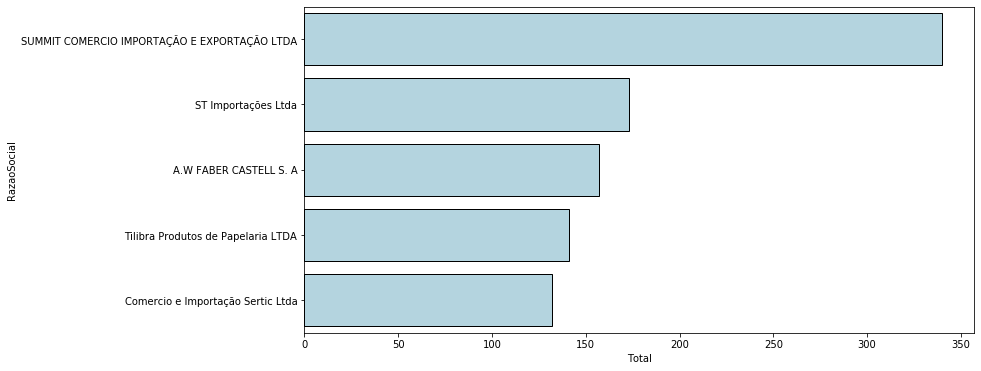

In [13]:
# consulta junção de 3 tabelas

df = pd.read_sql('select CNPJ, RazaoSocial, Total from ('+
                     'select CNPJ, RazaoSocial, count(*) as Total from empresa as e '+
                     'natural join Registros as r '+
                     'natural join Item as i '+
                     'where i.Pac = "Artigos escolares" '+
                     'group by cnpj '+
                     'order by total DESC'+
                 ') limit 5', conn)

plt.figure(figsize = (12,6))
sns.barplot(y=df['RazaoSocial'], x=df['Total'], color='lightblue', edgecolor='k')
plt.yticks(rotation=0)
plt.show()

In [14]:
df = pd.read_sql('select CNPJ, RazaoSocial, Total from ('+
                     'select e.CNPJ, RazaoSocial, count(*) as Total from empresa as e, Registros as r, Item as i '+
                     'where e.CNPJ = r.CNPJ and r.CodItem = i.CodItem and i.Pac = "Artigos escolares" '+
                     'group by e.cnpj '+
                     'order by total DESC'+
                 ') limit 5', conn)

df

,CNPJ,RazaoSocial,Total
0,73827982000163,SUMMIT COMERCIO IMPORTAÇÃO E EXPORTAÇÃO LTDA,340
1,02867220000142,ST Importações Ltda,173
2,59596908000152,A.W FABER CASTELL S. A,157
3,44990901000143,Tilibra Produtos de Papelaria LTDA,141
4,60840691000163,Comercio e Importação Sertic Ltda,132


#### 6.3.2 - Consulta 7 (duas versões)
7. RazaoSocial, CNPJ, UF e o Total de objetos registrados das dez empresas que mais registraram objetos em 2019 até o presente momento da coleta dos dados

In [15]:
df = pd.read_sql('select RazaoSocial, CNPJ, UF, Total from ('+
                     'select CNPJ, RazaoSocial, UF, count(*) as Total from empresa as e '+
                     'natural join Registros as r '+
                     'natural join Item as i '+
                     'where i.ItemDataAlteracao > "2018"'+
                     'group by cnpj '+
                 ')order by total DESC '+
                 'limit 10', conn)

df

,RazaoSocial,CNPJ,UF,Total
0,Bombas Grundfos do Brasil Ltda,02599337000192,SP,112
1,DANCOR S.A INDÚSTRIA MECÂNICA,33561853000151,RJ,104
2,SUMMIT COMERCIO IMPORTAÇÃO E EXPORTAÇÃO LTDA,73827982000163,RS,93
3,VOLKSWAGEN DO BRASIL INDUSTRIA DE VEÍCULOS AUT...,59104422001806,SP,84
4,Pilot Pen do Brasil S.A. - Ind. e Com.,61203931000505,SP,77
5,BMW do Brasil LTDA,00882430000699,SP,68
6,ISAPA IMPORTAÇÃO E COMÉRCIO LTDA,61327045000402,ES,66
7,ST Importações Ltda,02867220000142,SC,56
8,OUROLUX COMERCIAL LTDA,05393234000240,SP,55
9,A.W FABER CASTELL S. A,59596908000152,SP,55


In [16]:
df = pd.read_sql('select RazaoSocial, CNPJ, UF, count(*) as Total from empresa as e '+
                 'natural join Registros as r '+
                 'natural join Item as i '+
                 'where i.ItemDataAlteracao > "2018" '+
                 'group by cnpj '+
                 'order by Total DESC '+
                 'limit 10', conn)

df

,RazaoSocial,CNPJ,UF,Total
0,Bombas Grundfos do Brasil Ltda,02599337000192,SP,112
1,DANCOR S.A INDÚSTRIA MECÂNICA,33561853000151,RJ,104
2,SUMMIT COMERCIO IMPORTAÇÃO E EXPORTAÇÃO LTDA,73827982000163,RS,93
3,VOLKSWAGEN DO BRASIL INDUSTRIA DE VEÍCULOS AUT...,59104422001806,SP,84
4,Pilot Pen do Brasil S.A. - Ind. e Com.,61203931000505,SP,77
5,BMW do Brasil LTDA,00882430000699,SP,68
6,ISAPA IMPORTAÇÃO E COMÉRCIO LTDA,61327045000402,ES,66
7,ST Importações Ltda,02867220000142,SC,56
8,OUROLUX COMERCIAL LTDA,05393234000240,SP,55
9,A.W FABER CASTELL S. A,59596908000152,SP,55


#### 6.3.3 - Consulta 8 (duas versões)
8. CNPJ de empresas que tenham registros com data de validade para o ano de 2021 referentes a Portaria Inmetro nº 372 de 17/07/2012.

In [17]:
df = pd.read_sql( 'SELECT r.CNPJ, r.DataValidade FROM Registros r '
                  ' NATURAL JOIN Item i '
                  ' NATURAL JOIN Objeto o '
                  'WHERE r.DataValidade BETWEEN date(\'2021-01-01\') AND date(\'2021-12-31\') '
                  ' AND o.Portaria = \'Portaria Inmetro nº 372 de 17/07/2012\' '
                  'GROUP BY r.CNPJ', conn)


df

,CNPJ,DataValidade
0,00113691000130,2021-05-10
1,01175068000174,2021-03-07
2,01631805000104,2021-09-20
3,09072082000154,2021-05-10
4,20681034000104,2021-05-13
5,59704510000192,2021-09-20
6,82646332000102,2021-05-10


In [18]:
df = pd.read_sql( 'SELECT r.CNPJ, r.DataValidade FROM '
                  ' (SELECT * FROM Registros '
                  '  WHERE DataValidade BETWEEN date(\'2021-01-01\') AND date(\'2021-12-31\')) r '
                  ' NATURAL JOIN Item i '
                  ' NATURAL JOIN '
                  ' (SELECT * FROM Objeto '
                  '  WHERE Portaria = \'Portaria Inmetro nº 372 de 17/07/2012\' ) o '
                  'GROUP BY r.CNPJ', conn)

df

,CNPJ,DataValidade
0,00113691000130,2021-05-10
1,01175068000174,2021-03-07
2,01631805000104,2021-09-20
3,09072082000154,2021-05-10
4,20681034000104,2021-05-13
5,59704510000192,2021-09-20
6,82646332000102,2021-05-10


### 6.4 - Duas consultas envolvendo agregação sobre junção de duas ou mais relações

#### 6.4.1 - Consulta 9 (duas versões)
9. Empresa com maior número de registros (ativos e inativos) por região.

In [19]:
#1 consulta envolvendo funções de agregação sobre o resultado da junção de pelo menos duas relações

df = pd.read_sql('SELECT CNPJ, RazaoSocial, MAX(Quantidade) Registros, Regiao FROM ' +
                  '(SELECT e.CNPJ, e.RazaoSocial, COUNT(r.NumeroRegistro) Quantidade, ' +
                  '  CASE ' +
                  '    WHEN e.UF = \'AM\' OR e.UF = \'RR\' OR e.UF = \'AP\' OR e.UF = \'PA\' ' +
                  '       OR e.UF = \'TO\' OR e.UF = \'RO\' OR e.UF = \'AC\' ' +
                  '    THEN \'Norte\' ' +
                  '    WHEN e.UF = \'MG\' OR e.UF = \'SP\' OR e.UF = \'ES\' OR e.UF = \'RJ\' ' +
                  '    THEN \'Sudeste\' ' +
                  '    WHEN e.UF = \'PR\' OR e.UF = \'RS\' OR e.UF = \'SC\'  OR e.UF = \'DF\'' +
                  '    THEN \'Sul\' ' +
                  '    WHEN e.UF = \'MT\' OR e.UF = \'MS\' OR e.UF = \'GO\' ' +
                  '    THEN \'Centro-Oeste\' ' +
                  '    WHEN e.UF = \'MA\' OR e.UF = \'PI\' OR e.UF = \'CE\' OR e.UF = \'RN\' ' +
                  '       OR e.UF = \'PE\' OR e.UF = \'PB\' OR e.UF = \'SE\'  OR e.UF = \'AL\' ' +
                  '       OR e.UF = \'BA\' ' +
                  '    THEN \'Nordeste\' '
                  '  ELSE \'ACRE\' ' +
                  '  END AS REGIAO FROM Empresa e ' +
                  '  NATURAL JOIN Registros r '
                  '  GROUP BY REGIAO, e.CNPJ) ' +
                  'GROUP BY Regiao ORDER BY Registros DESC', conn)

df

,CNPJ,RazaoSocial,Registros,REGIAO
0,73827982000163,SUMMIT COMERCIO IMPORTAÇÃO E EXPORTAÇÃO LTDA,340,Sul
1,02599337000192,Bombas Grundfos do Brasil Ltda,316,Sudeste
2,02130525000177,"MARSCHALL INDÚSTRIA, COMÉRCIO, IMPORTAÇÃO E EX...",196,Nordeste
3,06097469000177,Peak Automotiva Ltda,100,Centro-Oeste
4,02513526000281,CICLO CAIRU LTDA,70,Norte


In [20]:
#1 consulta envolvendo funções de agregação sobre o resultado da junção de pelo menos duas relações

df = pd.read_sql( 'SELECT CNPJ, RazaoSocial, MAX(Registros) Registros, Regiao FROM '
                  '(SELECT e.CNPJ, e.RazaoSocial, SUM(Quantidade) Registros, ' +
                  '  CASE ' +
                  '    WHEN e.UF = \'AM\' OR e.UF = \'RR\' OR e.UF = \'AP\' OR e.UF = \'PA\' ' +
                  '       OR e.UF = \'TO\' OR e.UF = \'RO\' OR e.UF = \'AC\' ' +
                  '    THEN \'Norte\' ' +
                  '    WHEN e.UF = \'MG\' OR e.UF = \'SP\' OR e.UF = \'ES\' OR e.UF = \'RJ\' ' +
                  '    THEN \'Sudeste\' ' +
                  '    WHEN e.UF = \'PR\' OR e.UF = \'RS\' OR e.UF = \'SC\'  OR e.UF = \'DF\'' +
                  '    THEN \'Sul\' ' +
                  '    WHEN e.UF = \'MT\' OR e.UF = \'MS\' OR e.UF = \'GO\' ' +
                  '    THEN \'Centro-Oeste\' ' +
                  '    WHEN e.UF = \'MA\' OR e.UF = \'PI\' OR e.UF = \'CE\' OR e.UF = \'RN\' ' +
                  '       OR e.UF = \'PE\' OR e.UF = \'PB\' OR e.UF = \'SE\'  OR e.UF = \'AL\' ' +
                  '       OR e.UF = \'BA\' ' +
                  '    THEN \'Nordeste\' '
                  '  ELSE \'ACRE\' ' +
                  '  END AS REGIAO FROM Empresa e ' +
                  '  NATURAL JOIN ' +
                  '  (SELECT CNPJ, COUNT(CNPJ) Quantidade FROM Registros GROUP BY CNPJ) r '
                  '  GROUP BY REGIAO, e.CNPJ) '
                  ' GROUP BY REGIAO '
                  ' ORDER BY Registros DESC', conn)
df

,CNPJ,RazaoSocial,Registros,REGIAO
0,73827982000163,SUMMIT COMERCIO IMPORTAÇÃO E EXPORTAÇÃO LTDA,340,Sul
1,02599337000192,Bombas Grundfos do Brasil Ltda,316,Sudeste
2,02130525000177,"MARSCHALL INDÚSTRIA, COMÉRCIO, IMPORTAÇÃO E EX...",196,Nordeste
3,06097469000177,Peak Automotiva Ltda,100,Centro-Oeste
4,02513526000281,CICLO CAIRU LTDA,70,Norte


#### 6.4.2 - Consulta 10 (duas versões)
10. PACs com maior quantidade de registros por mês no ano de 2018.

In [21]:
#1 consulta envolvendo funções de agregação sobre o resultado da junção de pelo menos duas relações
df = pd.read_sql('SELECT Pac, Mês, MAX(Registros) Registros FROM'
                 '  (SELECT Pac, Mês, COUNT(Mês) Registros FROM ' +
                 '    (SELECT i.Pac, strftime(\'%m\', DataConcessao) Mês FROM Registros r ' +
                 '      NATURAL JOIN Item i ' +
                 '    WHERE DataConcessao BETWEEN date(\'2018-01-01\') AND date(\'2018-12-31\') )' +
                 '  GROUP BY Mês, Pac) ' +
                 'GROUP BY Mês ' +
                 'ORDER BY Mês', conn)
df

,Pac,Mês,Registros
0,Colchões e Colchonetes de Espuma Flexível de P...,01,66
1,Colchões e Colchonetes de Espuma Flexível de P...,02,101
2,Colchões e Colchonetes de Espuma Flexível de P...,03,45
3,Artigos escolares,04,38
4,Artigos escolares,05,92
5,Artigos escolares,06,50
6,Artigos escolares,07,137
7,Artigos escolares,08,105
8,Colchões e Colchonetes de Espuma Flexível de P...,09,114
9,Artigos escolares,10,96


In [22]:
#1 consulta envolvendo funções de agregação sobre o resultado da junção de pelo menos duas relações

df = pd.read_sql( 'SELECT Pac, Mês, MAX(Registros) Registros FROM '
                  ' (SELECT Pac, strftime(\'%m\', DataConcessao) Mês, COUNT(strftime(\'%m\', DataConcessao)) Registros FROM ' +
                  '    (SELECT * FROM Registros ' +
                  '     WHERE DataConcessao BETWEEN date(\'2018-01-01\') AND date(\'2018-12-31\')) r ' +
                  '      NATURAL JOIN Item i ' +
                  '  GROUP BY (strftime(\'%m\', DataConcessao)), Pac ) '
                  'GROUP BY Mês '
                  'ORDER BY Mês', conn)
df

,Pac,Mês,Registros
0,Colchões e Colchonetes de Espuma Flexível de P...,01,66
1,Colchões e Colchonetes de Espuma Flexível de P...,02,101
2,Colchões e Colchonetes de Espuma Flexível de P...,03,45
3,Artigos escolares,04,38
4,Artigos escolares,05,92
5,Artigos escolares,06,50
6,Artigos escolares,07,137
7,Artigos escolares,08,105
8,Colchões e Colchonetes de Espuma Flexível de P...,09,114
9,Artigos escolares,10,96


#### 6.5 Tempo de execução em comparação a consultas alternativas
Os gŕaficos abaixo demonstram a análise de desempenho de cada consulta, sendo o tempo a média do tempo de 100 execuções da consulta.

<img src='imgs/desempenho_100x.png'>

# 7 - Autoavaliação dos membros

#### **Avaliação Geral do Grupo**
Os membros do grupo colaboraram em todas as partes do trabalho como discussão, desenvolvimento, e análise do que foi feito pelos colegas na área do tratamento dos dados e geração do banco de dados, desenvolvimento dos modelos Relacional e Entidade Relacionamento, e geração das consultas.

##### **Vitor Franco Rezende**
Colaborei em alguns aspectos do desenvolvimento do modelo Relacional, e verificação para ver se o modelo se encontrava nas formas normais. Tentei realizar o tratamento dos dados, porém, devido a falta de conhecimento da linguagem sql tive um pouco de dificuldade, e essa parte acabou ficando em sua grande maioria com Felipe, acabei só analisando e dando algumas ideias para alteração do que ele estava propondo. Participei principalmente do desenvolvimento de consultas e revisão de algumas feitas pelos colegas. Por fim, concluo que o trabalho foi desenvolvido de maneira bem colaborativa entre todos componentes do grupo.

##### **Rafael Gonçalves de Oliveira**
Colaborei principalmente com o desenvolvimento das consultas, mas participei das discussões e revisões no processo de desenvolvimento dos modelos relacional e ER.

##### **Felipe Seppe de Faria**
Desenvolvi o Diagrama ER e o modelo Relacional com ajuda dos demais integrantes. Fiz o processamento dos dados, desde a concatenação dos arquivos até a inserção no banco de dados. Desenvolvi a análise de desempenho das consultas. Entretanto, tive pouca participação na elaboração das consultas.